### Homework 3

**1.** For a constant $c$, show that $E[(s-c)^2] = (c-E[s])^2 + Var[s]$. (2 points)

We know the $\text{Var}[s]$. 
$$
\begin{align}
\text{Var}[s] &= E[s^2] - E[s]^2 \\
\end{align} 
$$
$$
\begin{align}
E[(s-c)^2] &= E[s^2 -  2sc + c^2 + E[s]^2 - E[s]^2] \\
&= (E[s^2] - E[s]^2) + E[E[s]^2 - 2sc + c^2] \\
&= Var[s] + E[s]^2  - 2cE[s] + c^2 \\
&= Var[s] + (c - E[s])^2 
\end{align}
$$

**2.** Let $X \sim Poisson(\lambda)$.

**(a)**
Plot in Python the probability mass function (p.m.f.) of X for λ = 1; 5; 10; 50. What do you observe
about the shape of the p.m.f. as λ grows?
*(1 point)*

*Answer:* We know that for Poisson distribution that $E[X] = \lambda$ and $Var[X] = \lambda$ or $\sigma_X = \sqrt{\lambda}$.

 As $\lambda$ grows we note that distribution looks more normal with the mean shifting towards $\lambda$ and standard deviation growing wider.

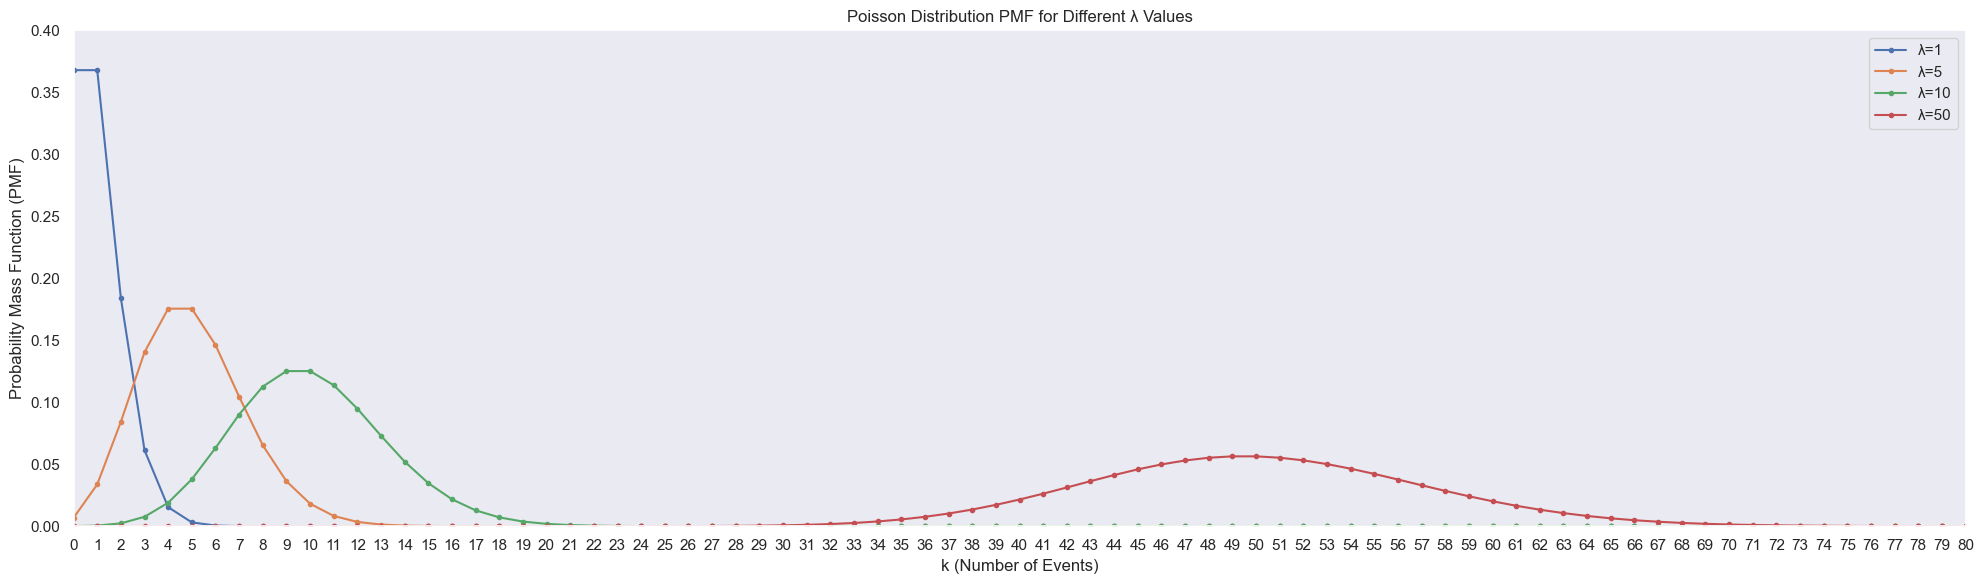

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

_lambdas = [1, 5, 10, 50]

k_max = 80 #int(_lambdas[-1] + 4 * np.sqrt(_lambdas[-1]))
k_values = np.arange(0, k_max + 1)
plt.figure(figsize=(20, 6))
plt.title('Poisson Distribution PMF for Different λ Values')
# Create PMF for x as \lambda grows: 
for lam in _lambdas:
    pmf = poisson.pmf(k_values, lam)
    plt.plot(k_values, pmf, label=f'λ={lam}', marker='o', markersize=3, linestyle='-')
plt.xlabel('k (Number of Events)')
plt.ylabel('Probability Mass Function (PMF)')
plt.xticks(k_values)
plt.xlim(0, k_max) 
plt.ylim(0, 0.4)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('poisson_pmf.png', dpi=300)
plt.show()

**(b)**
What are the parameters of the best matching Normal distribution for
a given Poisson distribution with parameter λ? No formal derivation is required here, use your intuition and verify by plotting (for the same values of
λ as above).
(1 point)

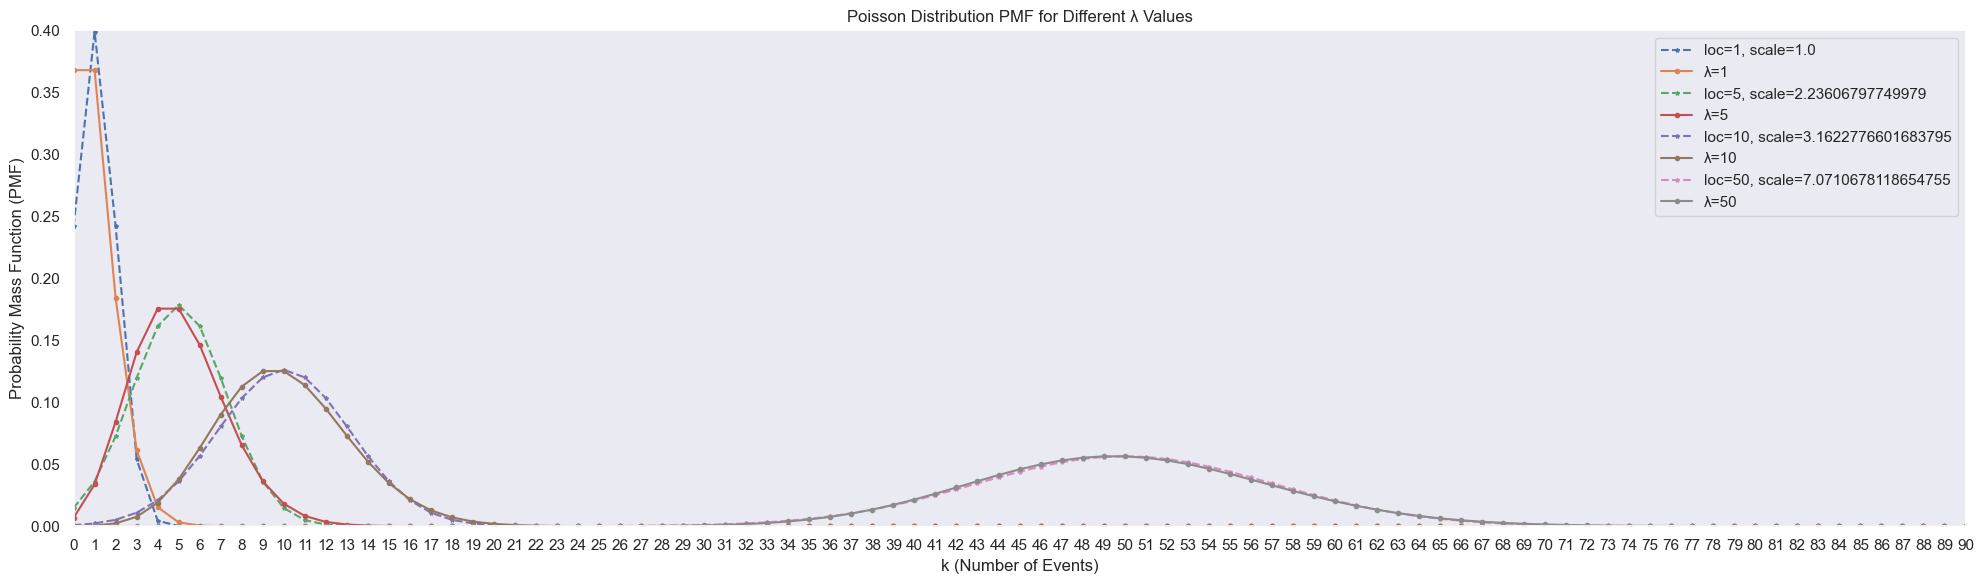

In [126]:
# What are the parameters of the best matching Normal distribution for
# a given Poisson distribution with parameter λ? No formal derivation is required here, use your intuition and verify by plotting (for the same values of
# λ as above).
# (1 point)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm

_lambdas = [1, 5, 10, 50]
_means = [1, 5, 10, 50]
_stds = np.sqrt(_means) 

k_max = 90 
k_values = np.arange(0, k_max + 1)
plt.figure(figsize=(20, 6))
plt.title('Poisson Distribution PMF for Different λ Values')
# Create PMF for x as \lambda grows: 
for lam in _lambdas:
    pmf = poisson.pmf(k_values, lam)
    bin_width = k_values[1] - k_values[0] # 1 
    normal_pmf = norm.pdf(k_values, loc=lam, scale=np.sqrt(lam)) * bin_width
    plt.plot(k_values, normal_pmf, label=f'loc={lam}, scale={np.sqrt(lam)}', marker='*', markersize=3, linestyle='--')
    plt.plot(k_values, pmf, label=f'λ={lam}', marker='o', markersize=3, linestyle='-')
plt.xlabel('k (Number of Events)')
plt.ylabel('Probability Mass Function (PMF)')
plt.xticks(k_values)
plt.xlim(0, k_max) 
plt.ylim(0, 0.4)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('poisson_pmf.png', dpi=300)
plt.show()

**3. Noise models**

Assume a tuning curve $f(s)$ with stimulus angle $s \in [-\pi, \pi]$:
$$f(s) = \begin{cases}
    - f_{max} \tfrac4{\pi^2} (s-\tfrac\pi2) (s + \tfrac\pi2) &\quad s \in [-\tfrac\pi2, \tfrac\pi2]\\
    0 &\quad else
\end{cases} $$
In each subtask the firing rate $r$ is given by a different noise model. For a discreticed interval (50 bins) for $s$ into, draw 10 samples from $p(r|f(s))$. Do this for different $f_{max} = 1; 10; 100$, and plot the rates, their mean $\pm$ sem (standard error of the mean), and the analytical function.
(1.5 points for each subtask)

**(a)** Additive normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=1$.

**(b)** Multiplicative normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=f(s)$.

**(c)** Poisson noise
$$p(r|f(s)=\frac{f(s)^r}{r!} e^{-f(s)}$$

**(d)** Negative Binomial
$$p(r|q,p)= {{r+q-1}\choose{r}} (1-p)^q p^r$$
with $p=\frac{f(s)}{f(s)+q}$, $q=f(s)$.
Be careful about the case when $p = 0$.

**(e)** Based on your results, briefly discuss how realistic each of these models is. (1 point)

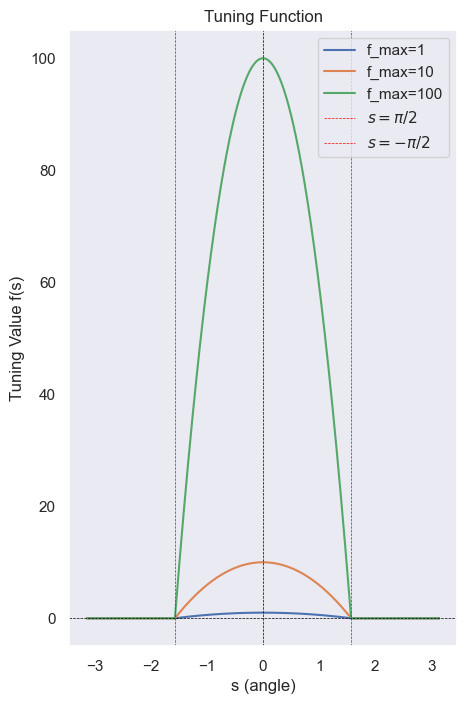

In [127]:
import numpy as np
import matplotlib.pyplot as plt

f_max_list = [1, 10, 100]
s_interval = np.linspace(-np.pi, np.pi, 1000, endpoint=True)

def tuning_function(s, f_max):
    if s >= -np.pi/2 and s <= np.pi/2:
        return -f_max * (4/(np.pi**2))   * (s - np.pi/2)*(s + np.pi/2)
    else:
        return 0

plt.figure(figsize=(5, 8))
for f_max in f_max_list:
    tuning_values = [tuning_function(s, f_max) for s in s_interval]
    plt.plot(s_interval, tuning_values, label=f"f_max={f_max}")
    
# mark pi and -pi
plt.axvline(np.pi/2, color='red', lw=0.5, ls='--', label='$s=\pi/2$')
plt.axvline(-np.pi/2, color='red', lw=0.5, ls='--', label='$s=-\pi/2$')

plt.title("Tuning Function")
plt.xlabel("s (angle)") 
plt.ylabel("Tuning Value f(s)")
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()

In [283]:
def plot_samples(s_vals, noiseless_f, samples , title, ax=None):
    n_samples = samples.shape[1] #
    for i in range(n_samples):
        ax.plot(s_vals, samples[:, i], color='blue', alpha=0.1)

    # Compute mean and SEM
    sample_mean = np.mean(samples, axis=1)
    sample_sem = np.std(samples, axis=1, ddof=1) / np.sqrt(n_samples)
    
    # Plot mean ± SEM
    ax.plot(s_vals, sample_mean, color='darkgreen', label='Mean', linewidth=2 , linestyle='dotted')
    ax.fill_between(s_vals, sample_mean - sample_sem, sample_mean + sample_sem, color='yellow', alpha=0.8, label='SEM')
    
    ax.plot(s_vals, noiseless_f, color='red', linestyle='--', label='Analytical', linewidth=2)

    
    ax.set_title(f"Noise Model: {title}")
    ax.set_xlabel("s (angle)") 
    ax.set_ylabel("r (observed firing rate)")

In [284]:
"""
**(a)** Additive normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=1$.
"""
def sample_additive_noise(f_vals, n_samples, s_vals):
    n_points = len(s_vals)
    assert f_vals.shape == (n_points,)
    samples = scipy.stats.norm.rvs(loc=f_vals[:, None], scale=1, size=(n_points, n_samples))
    assert samples.shape == (n_points, n_samples)
    return samples

In [285]:

"""
**(b)** Multiplicative normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=f(s)$.
"""

def sample_multiplicative_noise(f_vals, n_samples, s_vals):
    n_points = len(s_vals)
    #noiselesss_f = np.array([tuning_function(s, f_max) for s in s_vals])    # shape (51,)
    assert f_vals.shape == (n_points,)
    samples = scipy.stats.norm.rvs(loc=f_vals[:, None], scale=f_vals[:, None], size=(n_points, n_samples))
    assert samples.shape == (n_points, n_samples)
    return samples


In [286]:
"""
**(c)** Poisson noise
$$p(r|f(s)=\frac{f(s)^r}{r!} e^{-f(s)}$$
"""
def sample_poisson_noise(f_vals, n_samples, s_vals):
    n_points = len(s_vals)
    # Poisson draws: one call for the whole (n_points, n_samples) array
    samples = scipy.stats.poisson.rvs(mu=f_vals[:, None],  # broadcast over samples
                             size=(n_points, n_samples))
    assert samples.shape == (n_points, n_samples)
    return samples 

In [287]:
"""
**(d)** Negative Binomial
$$p(r|q,p)= {{r+q-1}\choose{r}} (1-p)^q p^r$$
with $p=\frac{f(s)}{f(s)+q}$, $q=f(s)$.
Be careful about the case when $p = 0$.
"""

def sample_negative_binomial(noiseless_f, n_samples, s_vals):
    n_points = len(s_vals)
    q = noiseless_f
    # compute p values for each q value as $p=\frac{f(s)}{f(s)+q}$,  
    p = noiseless_f / (noiseless_f + q + 1e-10)  # avoid division by zero
    # draw samples: shape (n_bins, n_samples) = (51, 10)
    samples = scipy.stats.nbinom.rvs(n=q[:, None], p=p[:, None], size=(n_points, n_samples))
    #scipy.stas.poisson()
    assert samples.shape == (n_points, n_samples)
    return samples

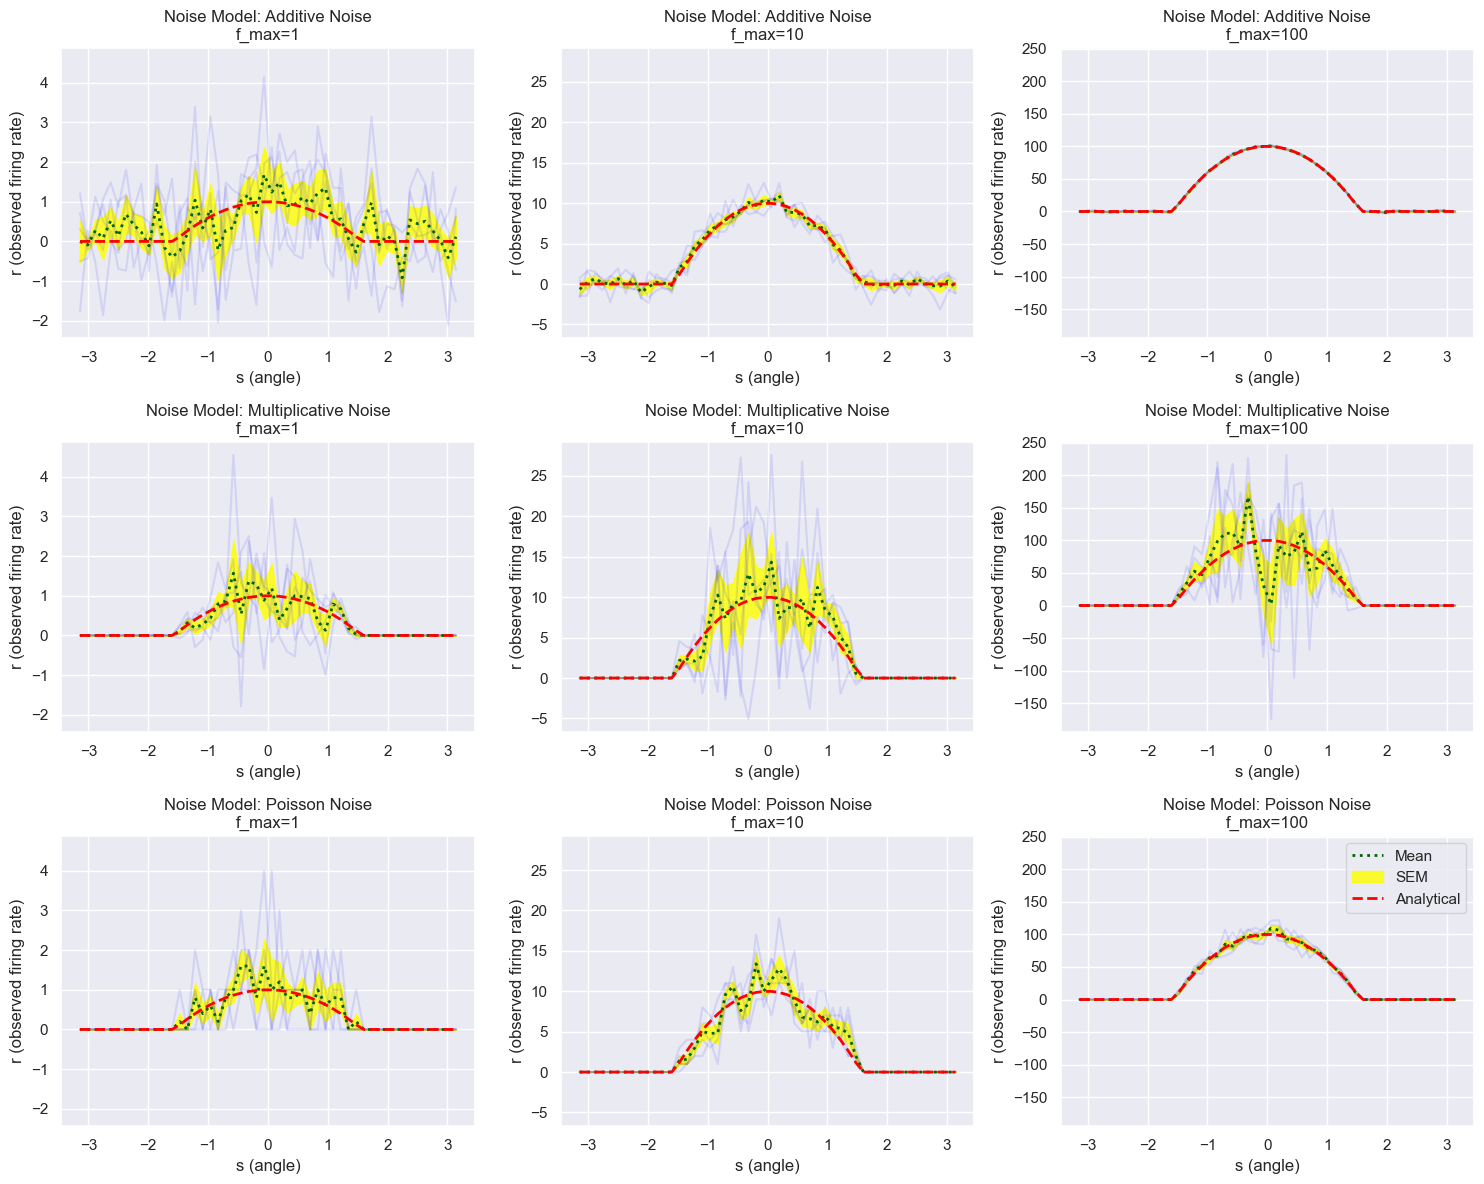

In [288]:
import numpy as np, matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

sns.set_theme()

sampling_functions = [{
    "sampling_function": sample_additive_noise, 
    "title": "Additive Noise"
}, 
{
    "sampling_function": sample_multiplicative_noise, 
    "title": "Multiplicative Noise"
},
{
    "sampling_function": sample_poisson_noise, 
    "title": "Poisson Noise"
}, 
#{ "sampling_function": sample_negative_binomial, "title": "Negative Binomial" }
]

n_points=50
n_samples=5

grid_points = np.linspace(-np.pi, np.pi, n_points) 
f_max_params = [1, 10, 100  ]
num_fs = len(f_max_params)

fig, ax = plt.subplots(len(sampling_functions), len(f_max_params),
                            figsize=(5 * len(f_max_params), 4 * len(sampling_functions)),
                            sharey="col")

for idx, item in enumerate(sampling_functions): 
    sampling_func = item["sampling_function"]
    base_title = item["title"]
    ax_row = ax[idx]
    for ax_i, f_max in zip(np.atleast_1d(ax_row), f_max_params):
        firing_rate = np.array([tuning_function(s, f_max) for s in grid_points])
        noisy_firing_rate = sampling_func(firing_rate, n_samples, grid_points)
        plot_samples(grid_points, firing_rate, noisy_firing_rate,
                     f"{base_title}\nf_max={f_max}", ax_i)
plt.legend()
fig.tight_layout()
plt.show()